<center><img src="http://mdst.eecs.umich.edu/images/mdst-logo-circle.png" width=350></center>

# Introduction to Linear Models

Linear models are some of the simplest classification techniques.  Before we continue, let's recall the distinction between regression and classification.

    Regression estimates a continuous output variable.
    
    Classification estimates a labelled output variable.
    
For many problems, either approach is valid, though frequently one will work better than the other.  Today we will briefly discuss several techniques for regression and classification for linear models.

## Data Investigation and Preparation

In [67]:
# We begin by importing numpy and pandas, as usual.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Before we get too far, let's take a look at the data that we will be working with.  You can find the data <a href="https://inclass.kaggle.com/c/mdst-flint/data">here</a>.  I recommend you create a working directory called "flint" and a subdirectory called "data" into which you can put the data.

Once you have downloaded the data and moved it into place, we can take a look at it.  You can see a description for each column at the link where you got the data.

In [68]:
train_df = pd.read_csv('./data/flint_train.csv')
test_df = pd.read_csv('./data/flint_test.csv')
train_df.head()

,sample_id,Lead_(ppb),parcel_id,Date_Submitted,google_add,Latitude,Longitude,Owner_Type,Land_Value,Land_Improvements_Value,...,Ward,PRECINCT,CENTRACT,CENBLOCK,SL_Type,SL_Type2,SL_Lead,Homestead,Homestead_Percent,HomeSEV
0,sample_012585,0.0,parcel_000036,2015-09-25 11:07:30,"1930 Colchester Rd, Flint, MI 48503, USA",42.994119,-83.723837,Private,20173,0,...,8,50,003600,6,1,0,0,Yes,100.0,35000
1,sample_006656,0.0,parcel_000036,2016-02-12 13:05:05,"1930 Colchester Rd, Flint, MI 48503, USA",42.994119,-83.723837,Private,20173,0,...,8,50,003600,6,1,0,0,Yes,100.0,35000
2,sample_007366,0.0,parcel_004160,2015-09-30 13:06:52,"605 Garland St, Flint, MI 48503, USA",43.020701,-83.696796,Private,15089,85227,...,5,32,002800,2,1,0,0,No,0.0,0
3,sample_014024,4.0,parcel_004160,2015-09-30 13:06:51,"605 Garland St, Flint, MI 48503, USA",43.020701,-83.696796,Private,15089,85227,...,5,32,002800,2,1,0,0,No,0.0,0
4,sample_003639,0.0,parcel_010786,2015-09-30 13:07:02,"4307 Ogema Ave, Flint, MI 48507, USA",42.984745,-83.660663,Private,7526,0,...,9,61,003500,3,1,0,0,Yes,100.0,0


Each of the linear models we will be examining requires all of our data to be numeric.  Let's take a look at the columns in the data frame that we just loaded.

In [69]:
train_df.columns.tolist()

['sample_id',
 'Lead_(ppb)',
 'parcel_id',
 'Date_Submitted',
 'google_add',
 'Latitude',
 'Longitude',
 'Owner_Type',
 'Land_Value',
 'Land_Improvements_Value',
 'Residential_Building_Value',
 'Residential_Building_Style',
 'Commercial_Building_Value',
 'Building_Storeys',
 'Parcel_Acres',
 'Rental',
 'Use_Type',
 'Prop_Class',
 'Year_Built',
 'USPS_Vacancy',
 'Zoning',
 'Future_Landuse',
 'DRAFT_Zone',
 'Housing_Condition_2012',
 'Housing_Condition_2014',
 'Commercial_Condition_2013',
 'Hydrant_Type',
 'Ward',
 'PRECINCT',
 'CENTRACT',
 'CENBLOCK',
 'SL_Type',
 'SL_Type2',
 'SL_Lead',
 'Homestead',
 'Homestead_Percent',
 'HomeSEV']

Some of these are already numbers. Some, however, are not but they seem like they should still be useful.  For example:

In [70]:
train_df[['Owner_Type', 'Use_Type', 'Hydrant_Type']].head()

,Owner_Type,Use_Type,Hydrant_Type
0,Private,Residential,Dar
1,Private,Residential,Dar
2,Private,Commercial,Mueller
3,Private,Commercial,Mueller
4,Private,Residential,Mueller


How can we make use of these variables?  One way is to create dummy variables.  The best way to explain dummy variables is with an example.  Thankfully, pandas has a built-in command that handles it for us.

In [71]:
pd.get_dummies(train_df[['Owner_Type', 'Use_Type', 'Hydrant_Type']]).head()

,Owner_Type_Land Bank,Owner_Type_Private,Owner_Type_Public,Use_Type_Commercial,Use_Type_Industrial,Use_Type_Residential,Hydrant_Type_A.D.,Hydrant_Type_Dar,Hydrant_Type_Mueller,Hydrant_Type_Other,Hydrant_Type_T.C.
0,0,1,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0


This is also called "one-hot encoding" if you want to sound fancy.  In your own words below, describe what the get_dummies command is doing.

To save you time and boredom, we have identified the variables that should be dummies below and created a new data frame.  In the process we dropped columns that will not be useful.

In [72]:
dummy_columns = ['Owner_Type', 'Residential_Building_Style', 'USPS_Vacancy', 
                 'Building_Storeys', 'Rental', 'Use_Type', 'Prop_Class', 'Zoning', 'Future_Landuse', 'DRAFT_Zone',
                 'Housing_Condition_2012', 'Housing_Condition_2014','Hydrant_Type', 'Ward', 'PRECINCT', 'CENTRACT', 
                 'Commercial_Condition_2013','CENBLOCK', 'SL_Type', 'SL_Type2', 'SL_Lead', 'Homestead']

drop_columns = ['sample_id', 'google_add', 'parcel_id', 'Date_Submitted']

combined_df = train_df.append(test_df)

combined_df = combined_df.drop(drop_columns, axis=1)
combined_df = pd.get_dummies(combined_df, columns = dummy_columns)

train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

# The combining of the dataframes created an empty column for lead in test_df.  We drop it here.
test_df = test_df.drop('Lead_(ppb)', axis=1)

#train_df = train_df.drop(drop_columns, axis=1)
#train_df = pd.get_dummies(train_df, columns=dummy_columns)

Now we create our train/test split for the classification problem.

In [73]:
from sklearn.model_selection import train_test_split

Ydata_r = train_df['Lead_(ppb)']
Ydata_c = train_df['Lead_(ppb)'] > 15
Xdata = train_df.drop('Lead_(ppb)', axis=1)

# Describe the difference between Ydata_r and Ydata_c
#

In [74]:
# We'll be starting with a regression problem, so split on Ydata_r
random_seed = 2018
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata, Ydata_r, random_state = random_seed)

## Linear Regression

Remember how we said that data prep is always most of the work?  Maybe you are starting to get a clearer picture of that.

Sklearn has several linear regression libraries coded up and ready to go for us.  We will using two different models, but you can find many more <a href="http://scikit-learn.org/stable/modules/linear_model.html">here</a>.

Let's begin with a simple model that uses the age of each home to predict the residential lead levels.

In [75]:
from sklearn.linear_model import LinearRegression
# create simple dataframes with year_built only, for homes with valid years
Xtrain_simple = Xtrain[Xtrain.Year_Built > 1810]['Year_Built'].values.reshape(-1, 1)
Ytrain_simple = Ytrain[Xtrain.Year_Built > 1810]
sum(Xtrain_simple == 0)

array([0])

In [76]:
lr_simple = LinearRegression()
lr_simple.fit(Xtrain_simple, Ytrain_simple)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear regression attempts to find a linear function of the input variables to minimize the prediction error. Specifically, simple linear regression (Ordinary Least Squares, or OLS) minimizes the value:

$RSS = \sum_{i=1}^n(y_i-\hat{y_i})^2$

This is known as the residual sum of squares. We'll talk about potential problems with this below, but this is the basic idea behind linear regression.

An OLS model typically consists of a set of $p + 1$ coefficients, or weights, one per predictor, which describe the linear relationship between each input and the response. We won't discuss the interpretation of these weights in detail, but if you use linear models in your research, make sure you interpret these weights carefully. 

Let's look at the weights for our simple model here.

In [77]:
lr_simple.coef_

array([-0.06883095])

In [78]:
lr_simple.intercept_

149.10018650821192

The weights are small, but they seem to make sense.

Another way to think about linear regression is that it forms the line of best fit through all of the data points, with respect to some outcome variable (in this case, lead ppb).

Let's look at a plot of our predictions and the true data, to get a better idea of what this simple model is doing, and how it fits the data.

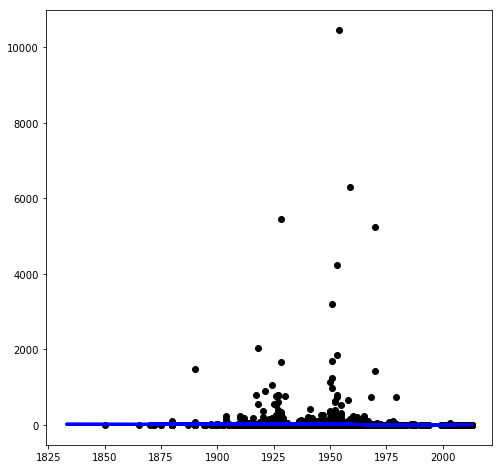

In [79]:
Xtest_simple = Xtest[Xtest.Year_Built > 1810]['Year_Built'].values.reshape(-1,1)
yhat_simple = lr_simple.predict(Xtest_simple)


fig = plt.figure()
fig.set_size_inches(8,8)
plt.scatter(Xtrain_simple, Ytrain_simple, color='black')
plt.plot(Xtest_simple, yhat_simple, color='blue', linewidth=3)

It looks like this model fits the majority of the data well, but the skewed response is quite clear from this graph. Let's try including more predictors to potentially capture other elements that might make our model fit better.

We're also going going to test out ridge regression, which is a form of regularization (or penalization) that keeps the model from overfitting by shrinking the model parameters. This helps solve a major issue with linear regression in many cases, which we'll talk about later.

In [80]:
from sklearn.linear_model import Ridge

# Create linear regression and ridge regression models
lr = LinearRegression()
rg = Ridge()

# Fit the models to the data

lr.fit(Xtrain, Ytrain)
rg.fit(Xtrain, Ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
# Now we can predict using the trained models.

yhat1 = lr.predict(Xtest)
yhat2 = rg.predict(Xtest)

In [83]:
# How well did we do?  One way to measure is to check the mean squared error.

from sklearn.metrics import mean_squared_error as mse

error1 = mse(Ytest, yhat1)
error2 = mse(Ytest, yhat2)

print(error1, error2)

(17070.632825409964, 17024.022278228582)


This is not very good, but it's something. Notice that the ridge regression achieves a slightly lower MSE, which suggests a slightly better fit on the test data. 

We could also explore including higher-order terms (i.e., creating a quadratic model) or doing some kind of feature selection. But let's try something else.

In [84]:
from sklearn.metrics import confusion_matrix as cm

pd.DataFrame(cm(Ytest > 15, yhat1 > 15))

,0,1
0,1613,787
1,117,100


In [85]:
pd.DataFrame(cm(Ytest > 15, yhat2 > 15))

,0,1
0,1604,796
1,118,99


## Logistic Regression

Logistic regression is typically a classification tool, not a regression tool.  It can also capture more complicated structure.

In [54]:
from sklearn.linear_model import LogisticRegression

# Create a new train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata, Ydata_c)

lr = LogisticRegression()

lr.fit(Xtrain, Ytrain)

yhat = lr.predict_proba(Xtest)

In [55]:
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import roc_curve

r = roc(Ytest, yhat[:,1])
print(r)

0.536328250018


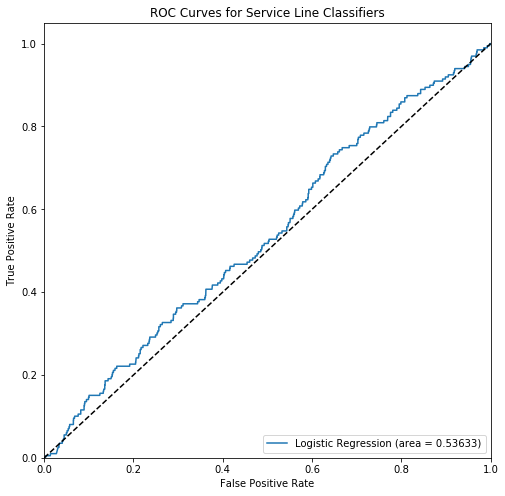

In [56]:
fig = plt.figure()
fig.set_size_inches(8,8)

fpr, tpr, _ = roc_curve(Ytest, yhat[:,1])
plt.plot(fpr, tpr, label= 'Logistic Regression (area = %0.5f)' % r)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Service Line Classifiers')
plt.legend(loc="lower right")

plt.show()

# Some final thoughts on Linear Regression
* Linear regression is a simple, highly interpretable tool for modeling data.
* Linear regression models the output as a linear (or quadratic, or cubic...) function of the input variables.
* Correlation among predictors (multicollinearity) is a huge problem for all forms of regression (including logistic regression). Strategies for dealing with this are beyond the scope of this tutorial, but they exist.
* Linear regression is probably most useful if (a) your data is actually modeling a natural phenomena which you believe might truly have (or be well-approximated by) a linear form; (b) your data is noisy; (c) you need an easily interpretable model; (d) you are exploring data.

# Logistic Regression

* Logistic regression is widely applied to real problems and can often achieve near state-of-art performance with good features.
* Logistic regression has a "low variance" but a "high bias" -- it tends not to overfit to data, but may underfit (this isn't always a problem).

If you want to do detailed statistical analysis of your models, you should consider using the `statsmodels` library or using R instead.